# Data preprocessing and split

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.13.0


In [109]:
data = pd.read_csv('/Users/ujong-yun/Documents/학부연구생/학부연구생 - dataset 공유 (csv).csv')
data.dropna()
regression_data = data.loc[data['Knocking'] == 0]
regression_data

,Case,Engine Speed,Spark Timing,Throttle Angle,Ambient Temperature,Intake Pressure,Intake Temperature,Exhaust Pressure,Exhaust Temperature,Injected Mass,Maximum Pressure,Crank Angle at Maximum Pressure,Maximum Rate of Pressure Rise,BMEP,IMEP,BSFC,BSNOx,BSCO,Knocking Index,Knocking
547,546.0,2000,-10,30,283,0.975,288.8,1.069,858.7,36.89,39.8,27.96,1.33,8.67,10.1,307.4,2.91,222.7,0.0,0.0
548,547.0,2000,-10,30,293,0.974,295.5,1.068,858.6,36.61,39.5,27.48,1.32,8.6,9.98,307.2,2.99,220.9,0.0,0.0
549,548.0,2000,-10,30,303,0.974,302.3,1.067,858.1,36.35,39.2,27.62,1.31,8.53,9.86,307.5,3.03,221.4,0.0,0.0
550,549.0,2000,-10,35,283,0.982,288.8,1.07,861.2,37.35,40.9,27.25,1.39,8.82,10.31,304.4,3.23,215.2,0.0,0.0
551,550.0,2000,-10,35,293,0.982,295.6,1.069,858.9,37.1,40.6,27.41,1.39,8.75,10.19,306.1,3.09,221.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,2140.0,6000,-10,85,293,0.969,294.1,1.493,1088.4,48.07,33.1,36.97,0.78,8.13,10.29,426,1.73,403,0.0,0.0
2142,2141.0,6000,-10,85,303,0.969,301.6,1.488,1089.5,47.74,33.3,36.99,0.78,8.08,10.27,425.9,1.81,402.8,0.0,0.0
2143,2142.0,6000,-10,90,283,0.97,286.6,1.498,1088.9,48.4,32.9,37.96,0.78,8.2,10.31,424.8,1.72,399.2,0.0,0.0
2144,2143.0,6000,-10,90,293,0.969,294.1,1.493,1088.5,48.08,33.1,36.97,0.78,8.14,10.29,425.9,1.74,402.7,0.0,0.0


In [110]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Case                             1064 non-null   float64
 1   Engine Speed                     1064 non-null   object 
 2   Spark Timing                     1064 non-null   object 
 3   Throttle Angle                   1064 non-null   object 
 4   Ambient Temperature              1064 non-null   object 
 5   Intake Pressure                  1064 non-null   object 
 6   Intake Temperature               1064 non-null   object 
 7   Exhaust Pressure                 1064 non-null   object 
 8   Exhaust Temperature              1064 non-null   object 
 9   Injected Mass                    1064 non-null   object 
 10  Maximum Pressure                 1064 non-null   object 
 11  Crank Angle at Maximum Pressure  1064 non-null   object 
 12  Maximum Rate of Pressur

In [111]:
input_data = regression_data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9]]
input_data
input_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Engine Speed         1064 non-null   object
 1   Spark Timing         1064 non-null   object
 2   Throttle Angle       1064 non-null   object
 3   Ambient Temperature  1064 non-null   object
 4   Intake Pressure      1064 non-null   object
 5   Intake Temperature   1064 non-null   object
 6   Exhaust Pressure     1064 non-null   object
 7   Exhaust Temperature  1064 non-null   object
 8   Injected Mass        1064 non-null   object
dtypes: object(9)
memory usage: 83.1+ KB


In [112]:
output_data = regression_data.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17]]
output_data
output_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Maximum Pressure                 1064 non-null   object
 1   Crank Angle at Maximum Pressure  1064 non-null   object
 2   Maximum Rate of Pressure Rise    1064 non-null   object
 3   BMEP                             1064 non-null   object
 4   IMEP                             1064 non-null   object
 5   BSFC                             1064 non-null   object
 6   BSNOx                            1064 non-null   object
 7   BSCO                             1064 non-null   object
dtypes: object(8)
memory usage: 74.8+ KB


In [113]:
input_data=input_data.astype('float')
output_data = output_data.astype('float')
input_data.info()
output_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Engine Speed         1064 non-null   float64
 1   Spark Timing         1064 non-null   float64
 2   Throttle Angle       1064 non-null   float64
 3   Ambient Temperature  1064 non-null   float64
 4   Intake Pressure      1064 non-null   float64
 5   Intake Temperature   1064 non-null   float64
 6   Exhaust Pressure     1064 non-null   float64
 7   Exhaust Temperature  1064 non-null   float64
 8   Injected Mass        1064 non-null   float64
dtypes: float64(9)
memory usage: 83.1 KB
<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Maximum Pressure                 1064 non-null   float64
 1   Crank Angle 

In [114]:
train_input, test_input, train_output, test_output = train_test_split(input_data, output_data, test_size=0.2, shuffle = True, random_state=42)
train_input, val_input, train_output, val_output = train_test_split(train_input, train_output, test_size = 0.1, shuffle=True, random_state=42)
print(train_input.shape, train_output.shape)
print(val_input.shape, val_output.shape)
print(test_input.shape, test_output.shape)


(765, 9) (765, 8)
(86, 9) (86, 8)
(213, 9) (213, 8)


In [115]:
print(test_output.index)

Index([ 578, 2135, 1282, 1743, 1854, 1499, 1510, 1522,  746, 1280,
       ...
       1465, 1993, 2019, 1216,  766, 1512,  715,  780, 2087,  572],
      dtype='int64', length=213)


In [116]:
ss = StandardScaler()
ss.fit(train_input)
train_scale = ss.transform(train_input)
val_scale =  ss.transform(val_input)
test_scale =  ss.transform(test_input)

# DNN Model

In [117]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, activation='relu', input_shape = (9, )))
model.add(keras.layers.Dense(128, activation= 'relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation= 'relu'))
model.add(keras.layers.Dense(16, activation= 'relu'))
model.add(keras.layers.Dense(8))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 256)               2560      
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 8)                 136       
                                                                 
Total params: 46456 (181.47 KB)
Trainable params: 4645

In [118]:
callback = keras.callbacks.EarlyStopping(monitor = 'loss', patience=10, verbose=True)
model.compile(tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss = 'mse', metrics=['mae', 'mse'])
history = model.fit(train_scale, train_output, validation_data=(val_scale, val_output) ,epochs=500, callbacks=[callback])

Epoch 1/500
24/24 [==============================] - 0s 6ms/step - loss: 25071.8535 - mae: 89.8119 - mse: 25071.8535 - val_loss: 26167.5430 - val_mae: 91.6073 - val_mse: 26167.5430
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 22722.3965 - mae: 84.3393 - mse: 22722.3965 - val_loss: 19029.4004 - val_mae: 80.1295 - val_mse: 19029.4004
Epoch 3/500
24/24 [==============================] - 0s 2ms/step - loss: 10625.6221 - mae: 72.5682 - mse: 10625.6221 - val_loss: 6098.0762 - val_mae: 61.2875 - val_mse: 6098.0762
Epoch 4/500
24/24 [==============================] - 0s 2ms/step - loss: 4463.3335 - mae: 50.7512 - mse: 4463.3335 - val_loss: 2963.7297 - val_mae: 40.3403 - val_mse: 2963.7297
Epoch 5/500
24/24 [==============================] - 0s 2ms/step - loss: 2068.1938 - mae: 32.3985 - mse: 2068.1938 - val_loss: 1278.6772 - val_mae: 25.3135 - val_mse: 1278.6772
Epoch 6/500
24/24 [==============================] - 0s 2ms/step - loss: 879.1797 - mae: 20.1706 - mse: 8

In [119]:
def plot_history(history):
    hist = history.history
    hist['epochs'] = history.epoch

    fig, axes = plt.subplots(1, 3, constrained_layout = True, figsize = (10, 5))
    axes[0].plot(hist['epochs'], hist['loss'], label = 'Training_loss')
    axes[0].plot(hist['epochs'], hist['val_loss'], label = 'val_loss')
    axes[1].plot(hist['epochs'], hist['mae'], label = 'Training_mae')
    axes[1].plot(hist['epochs'], hist['val_mae'], label = 'val_mae')
    axes[2].plot(hist['epochs'], hist['mse'], label = 'Training_mse')
    axes[2].plot(hist['epochs'], hist['val_mse'], label = 'val_mse')
    axes[0].set_title('Training and validation loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[1].set_title('Training and validation mae')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('MAE')
    axes[2].set_title('Training and validation mse')
    axes[2].set_xlabel('Epochs')
    axes[2].set_ylabel('MSE')
    axes[0].legend()
    axes[1].legend()
    axes[2].legend()
    plt.show()
    


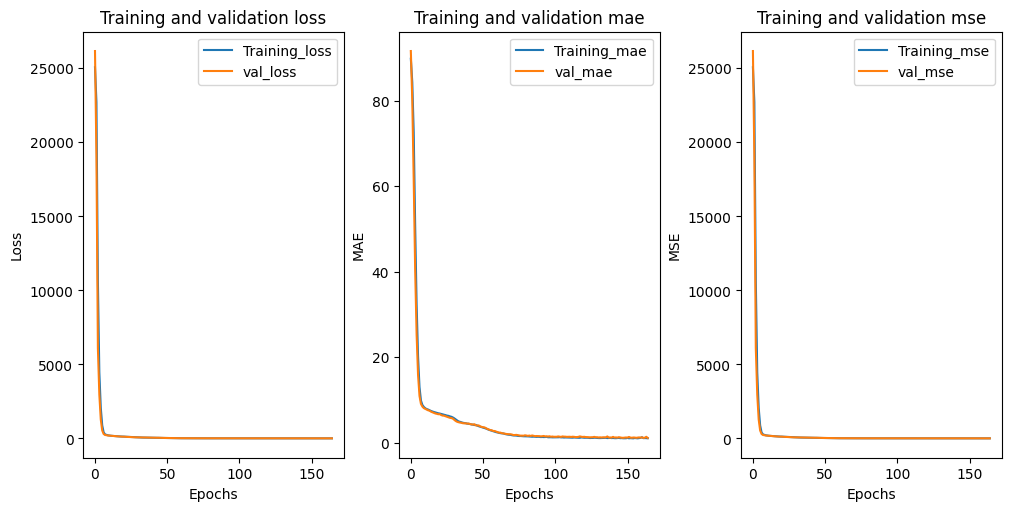

In [120]:
plot_history(history)

In [121]:
model.evaluate(test_scale, test_output)

7/7 [==============================] - 0s 979us/step - loss: 2.6708 - mae: 1.0481 - mse: 2.6708


[2.670809268951416, 1.0480678081512451, 2.670809268951416]

In [122]:
predicted = model.predict(test_scale)

7/7 [==============================] - 0s 785us/step


In [123]:
predicted_df = pd.DataFrame(predicted)
predicted_df

,0,1,2,3,4,5,6,7
0,40.192326,27.869808,1.352812,9.557193,10.618960,301.139465,3.548172,216.362747
1,33.554901,38.948776,1.200987,8.284436,10.789021,426.483948,2.311891,402.479126
2,63.657623,18.311701,3.141890,10.932319,12.667843,294.723297,5.387790,242.395966
3,39.140030,33.285225,1.778864,8.708732,10.908307,372.471069,3.267443,335.862091
4,60.061558,20.167904,2.766479,9.789615,12.287780,339.353027,4.207982,321.640656
...,...,...,...,...,...,...,...,...
208,51.374882,24.373442,2.507490,9.678802,11.555020,321.262482,4.386383,278.733887
209,49.375599,23.243044,1.867015,10.234813,11.346897,290.196381,4.138577,210.120773
210,40.614502,28.751945,1.480713,9.713894,10.686810,308.783356,3.722692,227.228928
211,40.690571,29.674990,1.511328,8.221702,10.576708,377.119507,2.573796,361.961243


In [124]:
predicted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       213 non-null    float32
 1   1       213 non-null    float32
 2   2       213 non-null    float32
 3   3       213 non-null    float32
 4   4       213 non-null    float32
 5   5       213 non-null    float32
 6   6       213 non-null    float32
 7   7       213 non-null    float32
dtypes: float32(8)
memory usage: 6.8 KB


In [125]:
predicted_df.columns = ['Maximum Pressure(predicted)', 'Crank Angle at Maximum Pressure(predicted)', 'Maximum Rate of Pressure Rise(predicted)', 'BMEP(predicted)',
                         'IMEP(predicted)', 'BSFC(predicted)', 'BSNOx(predicted)', 'BSCO(predicted)']
predicted_df

,Maximum Pressure(predicted),Crank Angle at Maximum Pressure(predicted),Maximum Rate of Pressure Rise(predicted),BMEP(predicted),IMEP(predicted),BSFC(predicted),BSNOx(predicted),BSCO(predicted)
0,40.192326,27.869808,1.352812,9.557193,10.618960,301.139465,3.548172,216.362747
1,33.554901,38.948776,1.200987,8.284436,10.789021,426.483948,2.311891,402.479126
2,63.657623,18.311701,3.141890,10.932319,12.667843,294.723297,5.387790,242.395966
3,39.140030,33.285225,1.778864,8.708732,10.908307,372.471069,3.267443,335.862091
4,60.061558,20.167904,2.766479,9.789615,12.287780,339.353027,4.207982,321.640656
...,...,...,...,...,...,...,...,...
208,51.374882,24.373442,2.507490,9.678802,11.555020,321.262482,4.386383,278.733887
209,49.375599,23.243044,1.867015,10.234813,11.346897,290.196381,4.138577,210.120773
210,40.614502,28.751945,1.480713,9.713894,10.686810,308.783356,3.722692,227.228928
211,40.690571,29.674990,1.511328,8.221702,10.576708,377.119507,2.573796,361.961243


In [126]:
predicted_df.index = test_output.index
predicted_df

,Maximum Pressure(predicted),Crank Angle at Maximum Pressure(predicted),Maximum Rate of Pressure Rise(predicted),BMEP(predicted),IMEP(predicted),BSFC(predicted),BSNOx(predicted),BSCO(predicted)
578,40.192326,27.869808,1.352812,9.557193,10.618960,301.139465,3.548172,216.362747
2135,33.554901,38.948776,1.200987,8.284436,10.789021,426.483948,2.311891,402.479126
1282,63.657623,18.311701,3.141890,10.932319,12.667843,294.723297,5.387790,242.395966
1743,39.140030,33.285225,1.778864,8.708732,10.908307,372.471069,3.267443,335.862091
1854,60.061558,20.167904,2.766479,9.789615,12.287780,339.353027,4.207982,321.640656
...,...,...,...,...,...,...,...,...
1512,51.374882,24.373442,2.507490,9.678802,11.555020,321.262482,4.386383,278.733887
715,49.375599,23.243044,1.867015,10.234813,11.346897,290.196381,4.138577,210.120773
780,40.614502,28.751945,1.480713,9.713894,10.686810,308.783356,3.722692,227.228928
2087,40.690571,29.674990,1.511328,8.221702,10.576708,377.119507,2.573796,361.961243


In [127]:
for i in range(8):
   predicted_df.insert(2*i+1, test_output.columns[i], test_output.iloc[:, [i]])
predicted_df

,Maximum Pressure(predicted),Maximum Pressure,Crank Angle at Maximum Pressure(predicted),Crank Angle at Maximum Pressure,Maximum Rate of Pressure Rise(predicted),Maximum Rate of Pressure Rise,BMEP(predicted),BMEP,IMEP(predicted),IMEP,BSFC(predicted),BSFC,BSNOx(predicted),BSNOx,BSCO(predicted),BSCO
578,40.192326,42.8,27.869808,26.73,1.352812,1.53,9.557193,8.97,10.618960,10.59,301.139465,304.0,3.548172,3.49,216.362747,220.0
2135,33.554901,32.8,38.948776,36.98,1.200987,0.77,8.284436,8.07,10.789021,10.21,426.483948,427.2,2.311891,1.72,402.479126,403.8
1282,63.657623,65.9,18.311701,18.78,3.141890,3.01,10.932319,11.48,12.667843,13.56,294.723297,296.5,5.387790,5.05,242.395966,241.8
1743,39.140030,38.9,33.285225,33.83,1.778864,1.00,8.708732,9.19,10.908307,11.60,372.471069,375.6,3.267443,2.35,335.862091,341.5
1854,60.061558,59.7,20.167904,20.87,2.766479,2.42,9.789615,10.20,12.287780,12.58,339.353027,336.8,4.207982,3.88,321.640656,317.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,51.374882,51.7,24.373442,25.85,2.507490,1.83,9.678802,10.52,11.555020,12.72,321.262482,323.3,4.386383,3.59,278.733887,280.7
715,49.375599,48.7,23.243044,22.73,1.867015,1.95,10.234813,9.86,11.346897,10.97,290.196381,291.3,4.138577,4.47,210.120773,209.8
780,40.614502,38.4,28.751945,29.57,1.480713,1.19,9.713894,9.32,10.686810,10.35,308.783356,307.5,3.722692,3.47,227.228928,226.5
2087,40.690571,42.6,29.674990,29.00,1.511328,1.30,8.221702,8.92,10.576708,11.10,377.119507,378.2,2.573796,2.53,361.961243,360.8


In [128]:
predicted_df.to_csv("Predicted_result.csv")